In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

In [ ]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

## Import relevant modules

The following cell imports the packages that the program requires:

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [3]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [4]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Train on 12 samples
Epoch 1/1000
12/12 [==============================] - 0s 23ms/sample - loss: 631.8627 - root_mean_squared_error: 25.1369
Epoch 2/1000
12/12 [==============================] - 0s 583us/sample - loss: 618.8159 - root_mean_squared_error: 24.8760
Epoch 3/1000
12/12 [==============================] - 0s 583us/sample - loss: 609.4823 - root_mean_squared_error: 24.6877
Epoch 4/1000
12/12 [==============================] - 0s 583us/sample - loss: 601.7451 - root_mean_squared_error: 24.5305
Epoch 5/1000
12/12 [==============================] - 0s 583us/sample - loss: 594.9335 - root_mean_squared_error: 24.3913
Epoch 6/1000
12/12 [==============================] - 0s 667us/sample - loss: 588.7370 - root_mean_squared_error: 24.2639
Epoch 7/1000
12/12 [==============================] - 0s 583us/sample - loss: 582.9826 - root_mean_squared_error: 24.1450
Epoch 8/1000
12/12 [==============================] - 0s 500us/sample - loss: 577.5629 - root_mean_squared_error: 24.0325
Epoch

Epoch 68/1000
12/12 [==============================] - 0s 583us/sample - loss: 361.7527 - root_mean_squared_error: 19.0198
Epoch 69/1000
12/12 [==============================] - 0s 583us/sample - loss: 358.7376 - root_mean_squared_error: 18.9404
Epoch 70/1000
12/12 [==============================] - 0s 583us/sample - loss: 355.7358 - root_mean_squared_error: 18.8610
Epoch 71/1000
12/12 [==============================] - 0s 584us/sample - loss: 352.7472 - root_mean_squared_error: 18.7816
Epoch 72/1000
12/12 [==============================] - 0s 500us/sample - loss: 349.7718 - root_mean_squared_error: 18.7022
Epoch 73/1000
12/12 [==============================] - 0s 583us/sample - loss: 346.8097 - root_mean_squared_error: 18.6228
Epoch 74/1000
12/12 [==============================] - 0s 583us/sample - loss: 343.8607 - root_mean_squared_error: 18.5435
Epoch 75/1000
12/12 [==============================] - 0s 500us/sample - loss: 340.9249 - root_mean_squared_error: 18.4642
Epoch 76/1000
12

Epoch 135/1000
12/12 [==============================] - 0s 500us/sample - loss: 188.6735 - root_mean_squared_error: 13.7358
Epoch 136/1000
12/12 [==============================] - 0s 583us/sample - loss: 186.5317 - root_mean_squared_error: 13.6577
Epoch 137/1000
12/12 [==============================] - 0s 500us/sample - loss: 184.4028 - root_mean_squared_error: 13.5795
Epoch 138/1000
12/12 [==============================] - 0s 584us/sample - loss: 182.2868 - root_mean_squared_error: 13.5014
Epoch 139/1000
12/12 [==============================] - 0s 500us/sample - loss: 180.1837 - root_mean_squared_error: 13.4233
Epoch 140/1000
12/12 [==============================] - 0s 583us/sample - loss: 178.0935 - root_mean_squared_error: 13.3452
Epoch 141/1000
12/12 [==============================] - 0s 500us/sample - loss: 176.0161 - root_mean_squared_error: 13.2671
Epoch 142/1000
12/12 [==============================] - 0s 500us/sample - loss: 173.9517 - root_mean_squared_error: 13.1891
Epoch 14

Epoch 202/1000
12/12 [==============================] - 0s 500us/sample - loss: 73.4446 - root_mean_squared_error: 8.5700
Epoch 203/1000
12/12 [==============================] - 0s 500us/sample - loss: 72.1547 - root_mean_squared_error: 8.4944
Epoch 204/1000
12/12 [==============================] - 0s 583us/sample - loss: 70.8773 - root_mean_squared_error: 8.4189
Epoch 205/1000
12/12 [==============================] - 0s 500us/sample - loss: 69.6122 - root_mean_squared_error: 8.3434
Epoch 206/1000
12/12 [==============================] - 0s 583us/sample - loss: 68.3596 - root_mean_squared_error: 8.2680
Epoch 207/1000
12/12 [==============================] - 0s 500us/sample - loss: 67.1195 - root_mean_squared_error: 8.1926
Epoch 208/1000
12/12 [==============================] - 0s 583us/sample - loss: 65.8918 - root_mean_squared_error: 8.1174
Epoch 209/1000
12/12 [==============================] - 0s 500us/sample - loss: 64.6765 - root_mean_squared_error: 8.0422
Epoch 210/1000
12/12 [==

Epoch 270/1000
12/12 [==============================] - 0s 583us/sample - loss: 13.3948 - root_mean_squared_error: 3.6599
Epoch 271/1000
12/12 [==============================] - 0s 500us/sample - loss: 12.9145 - root_mean_squared_error: 3.5937
Epoch 272/1000
12/12 [==============================] - 0s 583us/sample - loss: 12.4452 - root_mean_squared_error: 3.5278
Epoch 273/1000
12/12 [==============================] - 0s 500us/sample - loss: 11.9868 - root_mean_squared_error: 3.4622
Epoch 274/1000
12/12 [==============================] - 0s 583us/sample - loss: 11.5392 - root_mean_squared_error: 3.3969
Epoch 275/1000
12/12 [==============================] - 0s 500us/sample - loss: 11.1025 - root_mean_squared_error: 3.3320
Epoch 276/1000
12/12 [==============================] - 0s 583us/sample - loss: 10.6765 - root_mean_squared_error: 3.2675
Epoch 277/1000
12/12 [==============================] - 0s 583us/sample - loss: 10.2613 - root_mean_squared_error: 3.2033
Epoch 278/1000
12/12 [==

Epoch 338/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0226 - root_mean_squared_error: 1.0113
Epoch 339/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0197 - root_mean_squared_error: 1.0098
Epoch 340/1000
12/12 [==============================] - 0s 583us/sample - loss: 1.0172 - root_mean_squared_error: 1.0086
Epoch 341/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0148 - root_mean_squared_error: 1.0074
Epoch 342/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0127 - root_mean_squared_error: 1.0063
Epoch 343/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0106 - root_mean_squared_error: 1.0053
Epoch 344/1000
12/12 [==============================] - 0s 500us/sample - loss: 1.0086 - root_mean_squared_error: 1.0043
Epoch 345/1000
12/12 [==============================] - 0s 583us/sample - loss: 1.0065 - root_mean_squared_error: 1.0033
Epoch 346/1000
12/12 [==========

Epoch 406/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8991 - root_mean_squared_error: 0.9482
Epoch 407/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.9072 - root_mean_squared_error: 0.9525
Epoch 408/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8980 - root_mean_squared_error: 0.9476
Epoch 409/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8924 - root_mean_squared_error: 0.9447
Epoch 410/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8905 - root_mean_squared_error: 0.9437
Epoch 411/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8895 - root_mean_squared_error: 0.9431
Epoch 412/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8887 - root_mean_squared_error: 0.9427
Epoch 413/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8879 - root_mean_squared_error: 0.9423
Epoch 414/1000
12/12 [==========

Epoch 474/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 475/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 476/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 477/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 478/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 479/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 480/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 481/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 482/1000
12/12 [==========

Epoch 542/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 543/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 544/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 545/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 546/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 547/1000
12/12 [==============================] - 0s 584us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 548/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 549/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 550/1000
12/12 [==========

Epoch 610/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 611/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 612/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 613/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 614/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 615/1000
12/12 [==============================] - 0s 582us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 616/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 617/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 618/1000
12/12 [==========

Epoch 678/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 679/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 680/1000
12/12 [==============================] - 0s 584us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 681/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 682/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 683/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 684/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 685/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 686/1000
12/12 [==========

Epoch 746/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 747/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 748/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 749/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 750/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 751/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 752/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 753/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 754/1000
12/12 [==========

Epoch 814/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 815/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 816/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 817/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 818/1000
12/12 [==============================] - 0s 750us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 819/1000
12/12 [==============================] - 0s 750us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 820/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 821/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 822/1000
12/12 [==========

Epoch 882/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 883/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 884/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 885/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 886/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 887/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 888/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 889/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 890/1000
12/12 [==========

Epoch 950/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 951/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 952/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 953/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 954/1000
12/12 [==============================] - 0s 584us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 955/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 956/1000
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 957/1000
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 958/1000
12/12 [==========

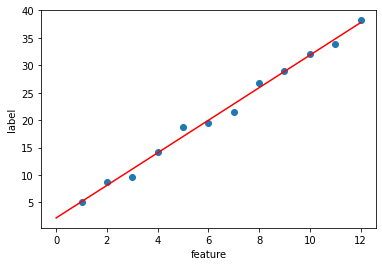

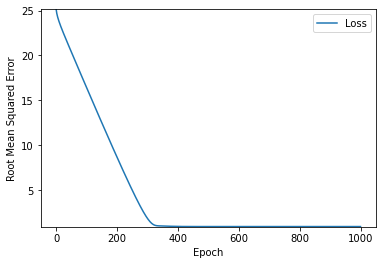

In [24]:
learning_rate=0.01
epochs=1000
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Train on 12 samples
Epoch 1/400
12/12 [==============================] - 0s 23ms/sample - loss: 224.9282 - root_mean_squared_error: 14.9976
Epoch 2/400
12/12 [==============================] - 0s 500us/sample - loss: 217.1808 - root_mean_squared_error: 14.7371
Epoch 3/400
12/12 [==============================] - 0s 583us/sample - loss: 211.6917 - root_mean_squared_error: 14.5496
Epoch 4/400
12/12 [==============================] - 0s 500us/sample - loss: 207.1727 - root_mean_squared_error: 14.3935
Epoch 5/400
12/12 [==============================] - 0s 500us/sample - loss: 203.2176 - root_mean_squared_error: 14.2554
Epoch 6/400
12/12 [==============================] - 0s 500us/sample - loss: 199.6381 - root_mean_squared_error: 14.1293
Epoch 7/400
12/12 [==============================] - 0s 583us/sample - loss: 196.3299 - root_mean_squared_error: 14.0118
Epoch 8/400
12/12 [==============================] - 0s 500us/sample - loss: 193.2278 - root_mean_squared_error: 13.9006
Epoch 9/400
1

Epoch 69/400
12/12 [==============================] - 0s 583us/sample - loss: 80.1581 - root_mean_squared_error: 8.9531
Epoch 70/400
12/12 [==============================] - 0s 500us/sample - loss: 78.8031 - root_mean_squared_error: 8.8771
Epoch 71/400
12/12 [==============================] - 0s 500us/sample - loss: 77.4606 - root_mean_squared_error: 8.8012
Epoch 72/400
12/12 [==============================] - 0s 583us/sample - loss: 76.1307 - root_mean_squared_error: 8.7253
Epoch 73/400
12/12 [==============================] - 0s 583us/sample - loss: 74.8134 - root_mean_squared_error: 8.6495
Epoch 74/400
12/12 [==============================] - 0s 500us/sample - loss: 73.5086 - root_mean_squared_error: 8.5737
Epoch 75/400
12/12 [==============================] - 0s 583us/sample - loss: 72.2163 - root_mean_squared_error: 8.4980
Epoch 76/400
12/12 [==============================] - 0s 500us/sample - loss: 70.9366 - root_mean_squared_error: 8.4224
Epoch 77/400
12/12 [====================

Epoch 137/400
12/12 [==============================] - 0s 500us/sample - loss: 15.9093 - root_mean_squared_error: 3.9886
Epoch 138/400
12/12 [==============================] - 0s 583us/sample - loss: 15.3719 - root_mean_squared_error: 3.9207
Epoch 139/400
12/12 [==============================] - 0s 500us/sample - loss: 14.8457 - root_mean_squared_error: 3.8530
Epoch 140/400
12/12 [==============================] - 0s 584us/sample - loss: 14.3307 - root_mean_squared_error: 3.7856
Epoch 141/400
12/12 [==============================] - 0s 500us/sample - loss: 13.8267 - root_mean_squared_error: 3.7184
Epoch 142/400
12/12 [==============================] - 0s 500us/sample - loss: 13.3338 - root_mean_squared_error: 3.6515
Epoch 143/400
12/12 [==============================] - 0s 500us/sample - loss: 12.8519 - root_mean_squared_error: 3.5850
Epoch 144/400
12/12 [==============================] - 0s 583us/sample - loss: 12.3810 - root_mean_squared_error: 3.5187
Epoch 145/400
12/12 [===========

Epoch 206/400
12/12 [==============================] - 0s 583us/sample - loss: 0.9198 - root_mean_squared_error: 0.9591
Epoch 207/400
12/12 [==============================] - 0s 584us/sample - loss: 0.9152 - root_mean_squared_error: 0.9567
Epoch 208/400
12/12 [==============================] - 0s 500us/sample - loss: 0.9116 - root_mean_squared_error: 0.9548
Epoch 209/400
12/12 [==============================] - 0s 500us/sample - loss: 0.9088 - root_mean_squared_error: 0.9533
Epoch 210/400
12/12 [==============================] - 0s 583us/sample - loss: 0.9066 - root_mean_squared_error: 0.9522
Epoch 211/400
12/12 [==============================] - 0s 584us/sample - loss: 0.9049 - root_mean_squared_error: 0.9513
Epoch 212/400
12/12 [==============================] - 0s 583us/sample - loss: 0.9037 - root_mean_squared_error: 0.9506
Epoch 213/400
12/12 [==============================] - 0s 500us/sample - loss: 0.9027 - root_mean_squared_error: 0.9501
Epoch 214/400
12/12 [===================

Epoch 275/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8883 - root_mean_squared_error: 0.9425
Epoch 276/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8884 - root_mean_squared_error: 0.9426
Epoch 277/400
12/12 [==============================] - 0s 584us/sample - loss: 0.8803 - root_mean_squared_error: 0.9383
Epoch 278/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8774 - root_mean_squared_error: 0.9367
Epoch 279/400
12/12 [==============================] - 0s 500us/sample - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 280/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8762 - root_mean_squared_error: 0.9361
Epoch 281/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8761 - root_mean_squared_error: 0.9360
Epoch 282/400
12/12 [==============================] - 0s 667us/sample - loss: 0.8760 - root_mean_squared_error: 0.9359
Epoch 283/400
12/12 [===================

Epoch 344/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 345/400
12/12 [==============================] - 0s 500us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 346/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8769 - root_mean_squared_error: 0.9365
Epoch 347/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 348/400
12/12 [==============================] - 0s 500us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 349/400
12/12 [==============================] - 0s 583us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 350/400
12/12 [==============================] - 0s 500us/sample - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 351/400
12/12 [==============================] - 0s 500us/sample - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 352/400
12/12 [===================

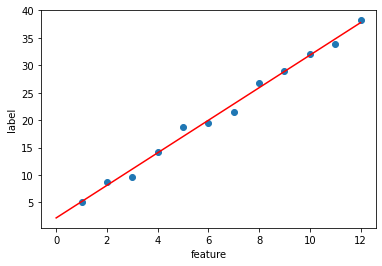

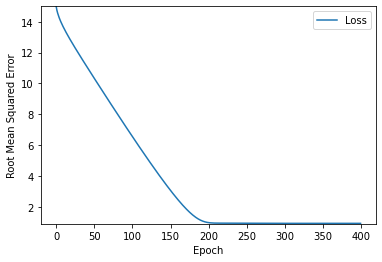

In [17]:
learning_rate=0.01
epochs= 400   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 0s 34ms/sample - loss: 848.3510 - root_mean_squared_error: 29.1265
Epoch 2/20
12/12 [==============================] - 0s 583us/sample - loss: 6665538.0000 - root_mean_squared_error: 2581.7703
Epoch 3/20
12/12 [==============================] - 0s 583us/sample - loss: 839.6633 - root_mean_squared_error: 28.9769
Epoch 4/20
12/12 [==============================] - 0s 583us/sample - loss: 4.8862 - root_mean_squared_error: 2.2105
Epoch 5/20
12/12 [==============================] - 0s 500us/sample - loss: 1.2855 - root_mean_squared_error: 1.1338
Epoch 6/20
12/12 [==============================] - 0s 500us/sample - loss: 1.2102 - root_mean_squared_error: 1.1001
Epoch 7/20
12/12 [==============================] - 0s 500us/sample - loss: 1.1870 - root_mean_squared_error: 1.0895
Epoch 8/20
12/12 [==============================] - 0s 500us/sample - loss: 1.1658 - root_mean_squared_error: 1.0797
Epoch 9/20
12/12 [============

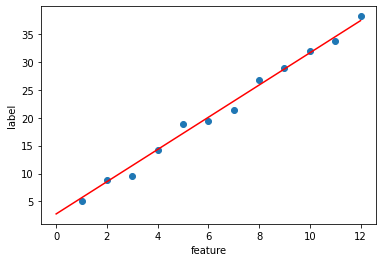

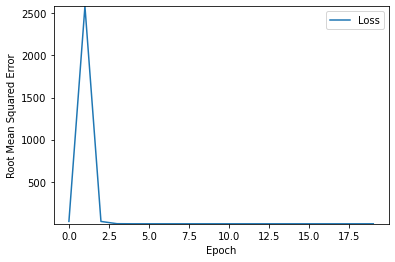

In [19]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=20

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

In [ ]:
# Set the learning rate and number of epochs
learning_rate= ?  # Replace ? with a floating-point number
epochs= ?   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 0s 23ms/sample - loss: 978.7811 - root_mean_squared_error: 31.2855
Epoch 2/100
12/12 [==============================] - 0s 1ms/sample - loss: 793.8343 - root_mean_squared_error: 28.1751
Epoch 3/100
12/12 [==============================] - 0s 1ms/sample - loss: 670.2695 - root_mean_squared_error: 25.8896
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 565.9784 - root_mean_squared_error: 23.7903
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 476.0607 - root_mean_squared_error: 21.8188
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 394.8959 - root_mean_squared_error: 19.8720
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 323.6779 - root_mean_squared_error: 17.9911
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 261.7186 - root_mean_squared_error: 16.1777
Epoch 9/100
12/12 [========

12/12 [==============================] - 0s 1ms/sample - loss: 1.0248 - root_mean_squared_error: 1.0123
Epoch 71/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1802 - root_mean_squared_error: 1.0864
Epoch 72/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1787 - root_mean_squared_error: 1.0857
Epoch 73/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.0500 - root_mean_squared_error: 1.0247
Epoch 74/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.0204 - root_mean_squared_error: 1.0102
Epoch 75/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1625 - root_mean_squared_error: 1.0782
Epoch 76/100
12/12 [==============================] - 0s 1ms/sample - loss: 0.8312 - root_mean_squared_error: 0.9117
Epoch 77/100
12/12 [==============================] - 0s 1ms/sample - loss: 1.1476 - root_mean_squared_error: 1.0713
Epoch 78/100
12/12 [==============================] - 0s 1ms/sample - loss: 1

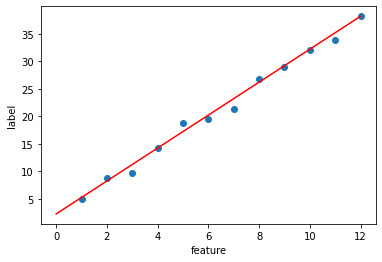

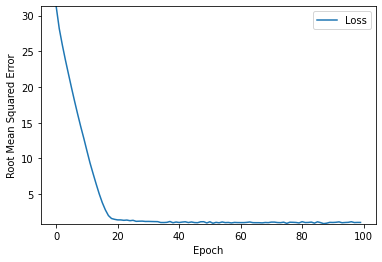

In [22]:
learning_rate=0.05
epochs=100
my_batch_size= 2  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#@title Double-click to view a possible solution

learning_rate=0.001
epochs=10000
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/10000
12/12 [==============================] - 0s 25ms/sample - loss: 506.0802 - root_mean_squared_error: 22.4962
Epoch 2/10000
12/12 [==============================] - 0s 2ms/sample - loss: 502.0026 - root_mean_squared_error: 22.4054
Epoch 3/10000
12/12 [==============================] - 0s 2ms/sample - loss: 498.4864 - root_mean_squared_error: 22.3268
Epoch 4/10000
12/12 [==============================] - 0s 2ms/sample - loss: 494.9222 - root_mean_squared_error: 22.2468
Epoch 5/10000
12/12 [==============================] - 0s 2ms/sample - loss: 491.4832 - root_mean_squared_error: 22.1694
Epoch 6/10000
12/12 [==============================] - 0s 2ms/sample - loss: 488.1599 - root_mean_squared_error: 22.0943
Epoch 7/10000
12/12 [==============================] - 0s 2ms/sample - loss: 484.6747 - root_mean_squared_error: 22.0153
Epoch 8/10000
12/12 [==============================] - 0s 2ms/sample - loss: 481.3542 - root_mean_squared_error: 21.9398
Epoch 9/100

12/12 [==============================] - 0s 2ms/sample - loss: 302.2688 - root_mean_squared_error: 17.3859
Epoch 69/10000
12/12 [==============================] - 0s 2ms/sample - loss: 299.5518 - root_mean_squared_error: 17.3076
Epoch 70/10000
12/12 [==============================] - 0s 2ms/sample - loss: 296.9208 - root_mean_squared_error: 17.2314
Epoch 71/10000
12/12 [==============================] - 0s 2ms/sample - loss: 294.3841 - root_mean_squared_error: 17.1576
Epoch 72/10000
12/12 [==============================] - 0s 2ms/sample - loss: 291.7748 - root_mean_squared_error: 17.0814
Epoch 73/10000
12/12 [==============================] - 0s 2ms/sample - loss: 289.1226 - root_mean_squared_error: 17.0036
Epoch 74/10000
12/12 [==============================] - 0s 2ms/sample - loss: 286.5209 - root_mean_squared_error: 16.9269
Epoch 75/10000
12/12 [==============================] - 0s 2ms/sample - loss: 284.0250 - root_mean_squared_error: 16.8530
Epoch 76/10000
12/12 [=================

Epoch 135/10000
12/12 [==============================] - 0s 2ms/sample - loss: 151.8870 - root_mean_squared_error: 12.3242
Epoch 136/10000
12/12 [==============================] - 0s 2ms/sample - loss: 150.0443 - root_mean_squared_error: 12.2493
Epoch 137/10000
12/12 [==============================] - 0s 2ms/sample - loss: 148.2929 - root_mean_squared_error: 12.1776
Epoch 138/10000
12/12 [==============================] - 0s 2ms/sample - loss: 146.5485 - root_mean_squared_error: 12.1057
Epoch 139/10000
12/12 [==============================] - 0s 2ms/sample - loss: 144.7173 - root_mean_squared_error: 12.0299
Epoch 140/10000
12/12 [==============================] - 0s 2ms/sample - loss: 142.9157 - root_mean_squared_error: 11.9547
Epoch 141/10000
12/12 [==============================] - 0s 2ms/sample - loss: 141.0320 - root_mean_squared_error: 11.8757
Epoch 142/10000
12/12 [==============================] - 0s 2ms/sample - loss: 139.2091 - root_mean_squared_error: 11.7987
Epoch 143/10000


12/12 [==============================] - 0s 2ms/sample - loss: 53.8377 - root_mean_squared_error: 7.3374
Epoch 203/10000
12/12 [==============================] - 0s 2ms/sample - loss: 52.7182 - root_mean_squared_error: 7.2607
Epoch 204/10000
12/12 [==============================] - 0s 2ms/sample - loss: 51.6872 - root_mean_squared_error: 7.1894
Epoch 205/10000
12/12 [==============================] - 0s 2ms/sample - loss: 50.5916 - root_mean_squared_error: 7.1128
Epoch 206/10000
12/12 [==============================] - 0s 2ms/sample - loss: 49.5488 - root_mean_squared_error: 7.0391
Epoch 207/10000
12/12 [==============================] - 0s 2ms/sample - loss: 48.5790 - root_mean_squared_error: 6.9699
Epoch 208/10000
12/12 [==============================] - 0s 2ms/sample - loss: 47.5615 - root_mean_squared_error: 6.8965
Epoch 209/10000
12/12 [==============================] - 0s 2ms/sample - loss: 46.5255 - root_mean_squared_error: 6.8210
Epoch 210/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 6.9125 - root_mean_squared_error: 2.6292
Epoch 270/10000
12/12 [==============================] - 0s 2ms/sample - loss: 6.5901 - root_mean_squared_error: 2.5671
Epoch 271/10000
12/12 [==============================] - 0s 2ms/sample - loss: 6.2725 - root_mean_squared_error: 2.5045
Epoch 272/10000
12/12 [==============================] - 0s 2ms/sample - loss: 5.9764 - root_mean_squared_error: 2.4447
Epoch 273/10000
12/12 [==============================] - 0s 2ms/sample - loss: 5.6854 - root_mean_squared_error: 2.3844
Epoch 274/10000
12/12 [==============================] - 0s 2ms/sample - loss: 5.4028 - root_mean_squared_error: 2.3244
Epoch 275/10000
12/12 [==============================] - 0s 2ms/sample - loss: 5.1299 - root_mean_squared_error: 2.2649
Epoch 276/10000
12/12 [==============================] - 0s 2ms/sample - loss: 4.8707 - root_mean_squared_error: 2.2070
Epoch 277/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 1.0368 - root_mean_squared_error: 1.0183
Epoch 338/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0370 - root_mean_squared_error: 1.0183
Epoch 339/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0353 - root_mean_squared_error: 1.0175
Epoch 340/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0351 - root_mean_squared_error: 1.0174
Epoch 341/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0349 - root_mean_squared_error: 1.0173
Epoch 342/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0325 - root_mean_squared_error: 1.0161
Epoch 343/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0329 - root_mean_squared_error: 1.0163
Epoch 344/10000
12/12 [==============================] - 0s 2ms/sample - loss: 1.0320 - root_mean_squared_error: 1.0159
Epoch 345/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9959 - root_mean_squared_error: 0.9980
Epoch 406/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9948 - root_mean_squared_error: 0.9974
Epoch 407/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9948 - root_mean_squared_error: 0.9974
Epoch 408/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9946 - root_mean_squared_error: 0.9973
Epoch 409/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9934 - root_mean_squared_error: 0.9967
Epoch 410/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9939 - root_mean_squared_error: 0.9969
Epoch 411/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9924 - root_mean_squared_error: 0.9962
Epoch 412/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9930 - root_mean_squared_error: 0.9965
Epoch 413/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9656 - root_mean_squared_error: 0.9827
Epoch 474/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9649 - root_mean_squared_error: 0.9823
Epoch 475/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9640 - root_mean_squared_error: 0.9819
Epoch 476/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9643 - root_mean_squared_error: 0.9820
Epoch 477/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9644 - root_mean_squared_error: 0.9820
Epoch 478/10000
12/12 [==============================] - 0s 3ms/sample - loss: 0.9637 - root_mean_squared_error: 0.9817
Epoch 479/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9625 - root_mean_squared_error: 0.9811
Epoch 480/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9623 - root_mean_squared_error: 0.9810
Epoch 481/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9424 - root_mean_squared_error: 0.9708
Epoch 542/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9428 - root_mean_squared_error: 0.9710
Epoch 543/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9423 - root_mean_squared_error: 0.9707
Epoch 544/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9425 - root_mean_squared_error: 0.9708
Epoch 545/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9413 - root_mean_squared_error: 0.9702
Epoch 546/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9410 - root_mean_squared_error: 0.9701
Epoch 547/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9413 - root_mean_squared_error: 0.9702
Epoch 548/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9405 - root_mean_squared_error: 0.9698
Epoch 549/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9259 - root_mean_squared_error: 0.9622
Epoch 610/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9250 - root_mean_squared_error: 0.9618
Epoch 611/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9252 - root_mean_squared_error: 0.9619
Epoch 612/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9246 - root_mean_squared_error: 0.9615
Epoch 613/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9253 - root_mean_squared_error: 0.9619
Epoch 614/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9243 - root_mean_squared_error: 0.9614
Epoch 615/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9239 - root_mean_squared_error: 0.9612
Epoch 616/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9241 - root_mean_squared_error: 0.9613
Epoch 617/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9139 - root_mean_squared_error: 0.9560
Epoch 678/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9124 - root_mean_squared_error: 0.9552
Epoch 679/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9129 - root_mean_squared_error: 0.9555
Epoch 680/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9130 - root_mean_squared_error: 0.9555
Epoch 681/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9124 - root_mean_squared_error: 0.9552
Epoch 682/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9128 - root_mean_squared_error: 0.9554
Epoch 683/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9125 - root_mean_squared_error: 0.9552
Epoch 684/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9119 - root_mean_squared_error: 0.9550
Epoch 685/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.9047 - root_mean_squared_error: 0.9511
Epoch 746/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9048 - root_mean_squared_error: 0.9512
Epoch 747/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9035 - root_mean_squared_error: 0.9505
Epoch 748/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9040 - root_mean_squared_error: 0.9508
Epoch 749/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9038 - root_mean_squared_error: 0.9507
Epoch 750/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9040 - root_mean_squared_error: 0.9508
Epoch 751/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9043 - root_mean_squared_error: 0.9510
Epoch 752/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.9033 - root_mean_squared_error: 0.9504
Epoch 753/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.8979 - root_mean_squared_error: 0.9476
Epoch 814/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8974 - root_mean_squared_error: 0.9473
Epoch 815/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8976 - root_mean_squared_error: 0.9474
Epoch 816/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8978 - root_mean_squared_error: 0.9475
Epoch 817/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8978 - root_mean_squared_error: 0.9475
Epoch 818/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8979 - root_mean_squared_error: 0.9476
Epoch 819/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8970 - root_mean_squared_error: 0.9471
Epoch 820/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8969 - root_mean_squared_error: 0.9470
Epoch 821/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.8925 - root_mean_squared_error: 0.9447
Epoch 882/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8932 - root_mean_squared_error: 0.9451
Epoch 883/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8926 - root_mean_squared_error: 0.9448
Epoch 884/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8940 - root_mean_squared_error: 0.9455
Epoch 885/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8927 - root_mean_squared_error: 0.9448
Epoch 886/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8928 - root_mean_squared_error: 0.9449
Epoch 887/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8925 - root_mean_squared_error: 0.9447
Epoch 888/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8928 - root_mean_squared_error: 0.9449
Epoch 889/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.8895 - root_mean_squared_error: 0.9432
Epoch 950/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8889 - root_mean_squared_error: 0.9428
Epoch 951/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8894 - root_mean_squared_error: 0.9431
Epoch 952/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8901 - root_mean_squared_error: 0.9434
Epoch 953/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8899 - root_mean_squared_error: 0.9433
Epoch 954/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8898 - root_mean_squared_error: 0.9433
Epoch 955/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8888 - root_mean_squared_error: 0.9427
Epoch 956/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8890 - root_mean_squared_error: 0.9429
Epoch 957/10000
12/12 [==============================] -

12/12 [==============================] - 0s 2ms/sample - loss: 0.8873 - root_mean_squared_error: 0.9420
Epoch 1018/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8869 - root_mean_squared_error: 0.9418
Epoch 1019/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8874 - root_mean_squared_error: 0.9420
Epoch 1020/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8870 - root_mean_squared_error: 0.9418
Epoch 1021/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8874 - root_mean_squared_error: 0.9420
Epoch 1022/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8870 - root_mean_squared_error: 0.9418
Epoch 1023/10000
12/12 [==============================] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.096 - 0s 2ms/sample - loss: 0.8867 - root_mean_squared_error: 0.9417
Epoch 1024/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8870 - root_mean_squared_error

12/12 [==============================] - 0s 2ms/sample - loss: 0.8852 - root_mean_squared_error: 0.9409
Epoch 1085/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8862 - root_mean_squared_error: 0.9414
Epoch 1086/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8852 - root_mean_squared_error: 0.9408
Epoch 1087/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8845 - root_mean_squared_error: 0.9405
Epoch 1088/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8852 - root_mean_squared_error: 0.9409
Epoch 1089/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8854 - root_mean_squared_error: 0.9409
Epoch 1090/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8854 - root_mean_squared_error: 0.9410
Epoch 1091/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8849 - root_mean_squared_error: 0.9407
Epoch 1092/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8842 - root_mean_squared_error: 0.9403
Epoch 1152/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8842 - root_mean_squared_error: 0.9403
Epoch 1153/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8846 - root_mean_squared_error: 0.9406
Epoch 1154/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8846 - root_mean_squared_error: 0.9405
Epoch 1155/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8840 - root_mean_squared_error: 0.9402
Epoch 1156/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8844 - root_mean_squared_error: 0.9404
Epoch 1157/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8838 - root_mean_squared_error: 0.9401
Epoch 1158/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8834 - root_mean_squared_error: 0.9399
Epoch 1159/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8832 - root_mean_squared_error: 0.9398
Epoch 1219/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8836 - root_mean_squared_error: 0.9400
Epoch 1220/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8833 - root_mean_squared_error: 0.9398
Epoch 1221/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8833 - root_mean_squared_error: 0.9398
Epoch 1222/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8835 - root_mean_squared_error: 0.9399
Epoch 1223/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8830 - root_mean_squared_error: 0.9397
Epoch 1224/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8839 - root_mean_squared_error: 0.9401
Epoch 1225/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8836 - root_mean_squared_error: 0.9400
Epoch 1226/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 1286/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8827 - root_mean_squared_error: 0.9395
Epoch 1287/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8827 - root_mean_squared_error: 0.9395
Epoch 1288/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 1289/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8831 - root_mean_squared_error: 0.9397
Epoch 1290/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8830 - root_mean_squared_error: 0.9397
Epoch 1291/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8829 - root_mean_squared_error: 0.9396
Epoch 1292/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8825 - root_mean_squared_error: 0.9394
Epoch 1293/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9393
Epoch 1353/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8820 - root_mean_squared_error: 0.9391
Epoch 1354/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8827 - root_mean_squared_error: 0.9395
Epoch 1355/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8828 - root_mean_squared_error: 0.9396
Epoch 1356/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 1357/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8820 - root_mean_squared_error: 0.9392
Epoch 1358/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8824 - root_mean_squared_error: 0.9394
Epoch 1359/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8824 - root_mean_squared_error: 0.9393
Epoch 1360/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 1420/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9394
Epoch 1421/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9392
Epoch 1422/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8817 - root_mean_squared_error: 0.9390
Epoch 1423/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8823 - root_mean_squared_error: 0.9393
Epoch 1424/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8819 - root_mean_squared_error: 0.9391
Epoch 1425/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9392
Epoch 1426/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8828 - root_mean_squared_error: 0.9396
Epoch 1427/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8827 - root_mean_squared_error: 0.9395
Epoch 1487/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8819 - root_mean_squared_error: 0.9391
Epoch 1488/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9393
Epoch 1489/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8814 - root_mean_squared_error: 0.9388
Epoch 1490/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8820 - root_mean_squared_error: 0.9391
Epoch 1491/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9393
Epoch 1492/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8822 - root_mean_squared_error: 0.9393
Epoch 1493/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8812 - root_mean_squared_error: 0.9387
Epoch 1494/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8817 - root_mean_squared_error: 0.9390
Epoch 1554/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8810 - root_mean_squared_error: 0.9386
Epoch 1555/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8824 - root_mean_squared_error: 0.9394
Epoch 1556/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8818 - root_mean_squared_error: 0.9390
Epoch 1557/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8817 - root_mean_squared_error: 0.9390
Epoch 1558/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8819 - root_mean_squared_error: 0.9391
Epoch 1559/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8813 - root_mean_squared_error: 0.9388
Epoch 1560/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8812 - root_mean_squared_error: 0.9387
Epoch 1561/10000
12/12 [=========================

12/12 [==============================] - 0s 2ms/sample - loss: 0.8814 - root_mean_squared_error: 0.9388
Epoch 1621/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8821 - root_mean_squared_error: 0.9392
Epoch 1622/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8814 - root_mean_squared_error: 0.9388
Epoch 1623/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8826 - root_mean_squared_error: 0.9395
Epoch 1624/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8818 - root_mean_squared_error: 0.9390
Epoch 1625/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8815 - root_mean_squared_error: 0.9389
Epoch 1626/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8824 - root_mean_squared_error: 0.9394
Epoch 1627/10000
12/12 [==============================] - 0s 2ms/sample - loss: 0.8817 - root_mean_squared_error: 0.9390
Epoch 1628/10000
12/12 [=========================

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.